# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, r2_score, mean_squared_error

# Data preperation 

Step 1: Read the Excel file
Step 2: Split the first column by commas
Step 3: Set the first row as header
Use first row as header
Drop the header row from data
Step 4: Reset index for clean dataframe
Step 5: Preview the cleaned dataframe

In [2]:

df_raw = pd.read_excel(r"D:\Downloads\Social_Network_Ads(1).xls", header=None)
df = df_raw[0].str.split(',', expand=True)
df.columns = df.iloc[0]  
df = df[1:]  
df.reset_index(drop=True, inplace=True)

print("Preview of the cleaned dataframe:")
print(df.head())

Preview of the cleaned dataframe:
0   User ID  Gender Age EstimatedSalary Purchased
0  15624510    Male  19           19000         0
1  15810944    Male  35           20000         0
2  15668575  Female  26           43000         0
3  15603246  Female  27           57000         0
4  15804002    Male  19           76000         0


# Data exploration
Get count of each type to check for balance

In [3]:
class_counts = df['Purchased'].value_counts()
print(class_counts)

Purchased
0    257
1    143
Name: count, dtype: int64


# Calculate percentages
# since its not 70/30 its not considered imbalanced


In [4]:

class_percentages = df['Purchased'].value_counts(normalize=True) * 100
print(f"\nClass percentages: {class_percentages.values[0]:.2f}% / {class_percentages.values[1]:.2f}%")



Class percentages: 64.25% / 35.75%


# Check dataframe info

In [5]:

print("\nDataframe information:")
df.info()


Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    object
 1   Gender           400 non-null    object
 2   Age              400 non-null    object
 3   EstimatedSalary  400 non-null    object
 4   Purchased        400 non-null    object
dtypes: object(5)
memory usage: 15.8+ KB


# Check for missing values

In [6]:


print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
0
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


# Check for duplicates

In [7]:


print("\nChecking for duplicates:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Checking for duplicates:
Number of duplicate rows: 0


# Drop the User ID column as it is not relevant for analysis
# Convert numeric columns to appropriate data types
# This avoids potential errors in analysis and ensures proper calculations


In [8]:

df = df.drop('User ID', axis=1)
cols = ['Age', 'EstimatedSalary', 'Purchased']
df[cols] = df[cols].apply(pd.to_numeric)

# Verify the data types after conversion

In [9]:

print("\nDataframe data types after conversion:")
print(df.dtypes)



Dataframe data types after conversion:
0
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


# Encode categorical variables (Gender: Female=0, Male=1)
# Label encoding is appropriate here as gender is a binary categorical feature

In [10]:

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


print("\nDataframe after encoding Gender (0=Female, 1=Male):")
print(df.head())


Dataframe after encoding Gender (0=Female, 1=Male):
0  Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0


# Display descriptive statistics to understand data distribution


In [11]:


print("\nDescriptive statistics:")
print(df.describe(percentiles=[.1, .25, .5, .75, .9, .99]))




Descriptive statistics:
0          Gender         Age  EstimatedSalary   Purchased
count  400.000000  400.000000       400.000000  400.000000
mean     0.490000   37.655000     69742.500000    0.357500
std      0.500526   10.482877     34096.960282    0.479864
min      0.000000   18.000000     15000.000000    0.000000
10%      0.000000   24.000000     26000.000000    0.000000
25%      0.000000   29.750000     43000.000000    0.000000
50%      0.000000   37.000000     70000.000000    0.000000
75%      1.000000   46.000000     88000.000000    1.000000
90%      1.000000   52.100000    122000.000000    1.000000
99%      1.000000   60.000000    148010.000000    1.000000
max      1.000000   60.000000    150000.000000    1.000000


# Visualize correlation matrix
# to see which features are correlated with each other


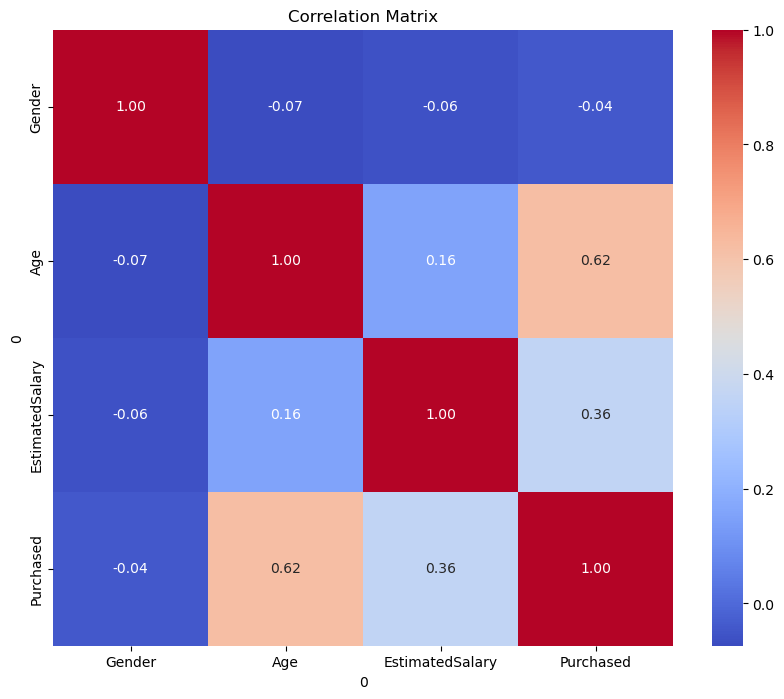

In [12]:

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Prepare features and target variables
# Using all relevant features including Gender

In [13]:

X = df[['Age', 'EstimatedSalary', 'Gender']]
Y = df['Purchased'] 

# Split data into training and test sets
# split: 80% training, 20% test

In [14]:

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("\nData split sizes:")
print(f"Training set: {X_Train.shape}")
print(f"Test set: {X_Test.shape}")


Data split sizes:
Training set: (320, 3)
Test set: (80, 3)


# Feature scaling
#  Each dataset should be scaled using the fit from the training data to prevent data leakage
 # Fit and transform training data
 # Only transform test data using training fit
# This prevents data leakage. we don’t want our model to "see" statistics from the test set during training

In [15]:

scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train) 
X_Test_scaled = scaler.transform(X_Test)  


In [ ]:
# Create and train the logistic regression model
# Using default settings with L2 regularization (C=1.0)
# random_state=0 (or any number) to get the same results every time you run the model.
classifier = LogisticRegression(random_state=0)  
classifier.fit(X_Train_scaled, Y_Train)
# Then Generate predictions

y_pred_train = classifier.predict(X_Train_scaled)
y_pred_test = classifier.predict(X_Test_scaled)

# Evaluate model performance
# model does better on the test set than on the training set It  indicate:
# Good generalization

In [23]:

print("\n===== MODEL EVALUATION =====")

# Training set metrics
print("\nTRAINING SET PERFORMANCE:")
print(f"Accuracy: {accuracy_score(Y_Train, y_pred_train):.4f}")
print(f"Precision: {precision_score(Y_Train, y_pred_train):.4f}")
print(f"F1 Score: {f1_score(Y_Train, y_pred_train):.4f}")


# Test set metrics
print("\nTEST SET PERFORMANCE:")
print(f"Accuracy: {accuracy_score(Y_Test, y_pred_test):.4f}")
print(f"Precision: {precision_score(Y_Test, y_pred_test):.4f}")
print(f"F1 Score: {f1_score(Y_Test, y_pred_test):.4f}")



===== MODEL EVALUATION =====

TRAINING SET PERFORMANCE:
Accuracy: 0.8281
Precision: 0.8235
F1 Score: 0.7534

TEST SET PERFORMANCE:
Accuracy: 0.9250
Precision: 0.9000
F1 Score: 0.8571


In [26]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(classifier,X,Y,cv=10).mean())

0.825


d:\projects\anaconda3\envs\tf39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\projects\anaconda3\envs\tf39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

# Create and visualize confusion matrix for validation set

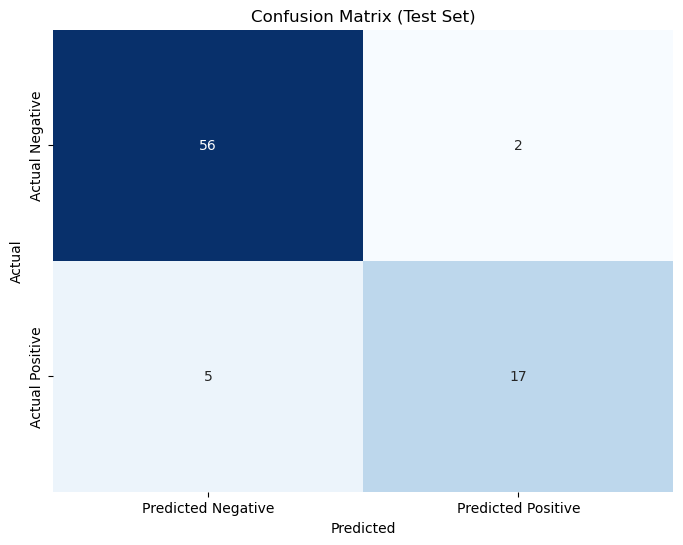

In [18]:

cm_val = confusion_matrix(Y_Test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()


📊 Model Findings

1. Model Performance**:
- Training Accuracy**: 82.50%
- Test Accuracy**: 91.25%
- Precision (Test Set): 89.47%
- F1 Score (Test Set): 82.93%
- The model performs well on both training and test data, with no overfitting detected.

2. :
- strong positive relationship between age and the target of making a purchase.


